In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer
import statsmodels.api as sma
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import tree
from scipy.stats import randint

In [3]:
df1=pd.read_csv("df_trim.csv")
df1.head()

,product_id,time_id,customer_id,promotion_id,store_id,store_sales,store_cost,unit_sales,product_class_id,brand_name,...,houseowner,num_cars_owned,fullname,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,promotion_period
0,451,677,7366,207,3,7.12,2.2784,4,55,Red Wing,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
1,1293,677,7366,207,3,5.76,1.7856,4,14,Booker,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
2,738,677,7366,207,3,5.55,2.0535,3,39,Consolidated,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
3,1426,677,8947,207,3,7.48,2.2440,2,61,Hermanos,...,Y,2,Robert Bell,11/7/1997,Friday,1997,11,7,34279,4
4,338,677,8947,207,3,2.28,1.0488,4,58,Better,...,Y,2,Robert Bell,11/7/1997,Friday,1997,11,7,34279,4


In [4]:
#Impute null values with median for specified columns
columns_to_impute = ['store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft']
imputer = SimpleImputer(strategy='median')
df1[columns_to_impute] = imputer.fit_transform(df1[columns_to_impute])

In [5]:
# Check for remaining null values
df_null = df1.isnull().sum()
df_null

product_id          0
time_id             0
customer_id         0
promotion_id        0
store_id            0
                   ..
the_year            0
the_month           0
day_of_month        0
day_since_epoch     0
promotion_period    0
Length: 94, dtype: int64

In [6]:
# Remove specified columns
columns_to_remove = ["lname", "fname", "mi", "address1", "address2"]
df1 = df1.drop(columns=columns_to_remove)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70751 entries, 0 to 70750
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             70751 non-null  int64  
 1   time_id                70751 non-null  int64  
 2   customer_id            70751 non-null  int64  
 3   promotion_id           70751 non-null  int64  
 4   store_id               70751 non-null  int64  
 5   store_sales            70751 non-null  float64
 6   store_cost             70751 non-null  float64
 7   unit_sales             70751 non-null  int64  
 8   product_class_id       70751 non-null  int64  
 9   brand_name             70751 non-null  object 
 10  product_name           70751 non-null  object 
 11  SKU                    70751 non-null  int64  
 12  SRP                    70751 non-null  float64
 13  gross_weight           70751 non-null  float64
 14  net_weight             70751 non-null  float64
 15  re

# trying model with 56 columns where id columns, date columns are removed.

In [8]:
df_old=df1[['store_sales', 'store_cost', 'unit_sales','brand_name', 'product_name','SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'cases_per_pallet', 'shelf_width', 'shelf_height', 'shelf_depth',
       'subcategory', 'category', 'department', 'family','promotion_name', 'media_type', 'cost','sales_city',
       'sales_state_province', 'sales_district', 'sales_region',
       'sales_country','store_type', 'store_name','store_city', 'store_state','store_country', 'store_manager','store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist','city',
       'state_province','country','marital_status', 'yearly_income',
       'gender', 'total_children', 'num_children_at_home', 'education','member_card', 'occupation', 'houseowner',
       'num_cars_owned','promotion_period']]

In [9]:
df_old=pd.get_dummies(df_old)

In [10]:
X = df_old.drop(columns=['cost'])
y = df_old['cost']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [12]:
model_lr=sma.OLS(y_train,sma.add_constant(X_train)).fit()

In [13]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     16.80
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:57:57   Log-Likelihood:            -5.2073e+05
No. Observations:               56600   AIC:                         1.045e+06
Df Residuals:                   54843   BIC:                         1.061e+06
Df Model:                        1756                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      653.9967     10.641     61.461      0.000     633.140     674.853
store_sales                                                 -9.1742     16.436     -0.558      0.577     -41.388      23.040
store_cost                                                  -0.9605     23.898     -0.040      0.968     -47.801      45.880
unit_sales                                                  10.6723     31.299      0.341      0.733     -50.673      72.018
SRP                                                         45.1818     42.908      1.053      0.292     -38.919     129.283
gross_weight                                                15.1976     15.649      0.971      0.331     -15.475      45.871
net_weight                                                 -15.2612     15.461     -0.987      0.324     -45.565      15.043
recyclable_package                                           0.9851     22.134      0.045      0.965     -42.398      44.369
low_fat                                                     -1.9400     25.550     -0.076      0.939     -52.018      48.138
units_per_case                                               0.8487      1.069      0.794      0.427      -1.246       2.943
cases_per_pallet                                            -0.8682      4.470     -0.194      0.846      -9.630       7.894
shelf_width                                                 -0.1336      1.915     -0.070      0.944      -3.887       3.620
shelf_height                                                -1.5147      2.012     -0.753      0.452      -5.458       2.429
shelf_depth                                                 -2.0262      1.954     -1.037      0.300      -5.855       1.803
store_sqft                                                  -0.0504      0.073     -0.691      0.489      -0.193       0.092
grocery_sqft                                                 0.2614      0.073      3.564      0.000       0.118       0.405
frozen_sqft                                               -166.6788     12.882    -12.939      0.000    -191.927    -141.430
meat_sqft                                                  250.5314     19.329     12.961      0.000     212.646     288.417
coffee_bar                                                 458.5691     18.219     25.170      0.000     422.860     494.279
video_store                                                 46.2010     18.287      2.526      0.012      10.359      82.043
salad_bar                                                 -266.6924     12.998    -20.518      0.000    -292.168    -241.217
prepared_food                                               -3.8442     10.872     

In [14]:

significant_pvalues = model_lr.pvalues[model_lr.pvalues < 0.05]

# Print the significant p-values
if not significant_pvalues.empty:
    print("Significant p-values:")
    print(significant_pvalues)
else:
    print("No significant p-values.")


Significant p-values:
const                         0.000000e+00
grocery_sqft                  3.653815e-04
frozen_sqft                   3.086222e-38
meat_sqft                     2.311104e-38
coffee_bar                   5.308656e-139
                                 ...      
member_card_Silver            1.147946e-09
occupation_Manual             3.868432e-08
occupation_Skilled Manual     2.791238e-15
houseowner_N                 1.965912e-147
houseowner_Y                 1.399167e-147
Length: 380, dtype: float64


In [15]:
len(significant_pvalues)

380

In [16]:
ypred_train=model_lr.predict(sma.add_constant(X_train))
ypred_test=model_lr.predict(sma.add_constant(X_test))

In [17]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 5736717.718581464
Mean squared error for test data: 6111309.366235844


In [18]:
from sklearn.model_selection import cross_val_score
model_lr=LinearRegression()
# Example: Cross-validation with 5 folds
scores = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)


Cross-validated RMSE: [ 9169599.89774525  7883776.3128644   9453795.79373132 11799963.23254973
 12524893.21658106]


In [19]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7883776.3128643995 12524893.216581056 10166405.69069435


* there is high variance across MSE scores.

# decision tree regressor

In [19]:
dtr=DecisionTreeRegressor(random_state=42)
model_dtr=dtr.fit(X_train,y_train)

In [20]:
ypred_train=model_dtr.predict(X_train)
ypred_test=model_dtr.predict(X_test)

In [21]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


In [22]:
# Example: Cross-validation with 5 folds
scores = cross_val_score(DecisionTreeRegressor(random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated RMSE: [10887694.85407392 11872594.00939929 12169680.26699647 12329966.98763251
 12815870.77540636]


In [23]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10887694.854073917 12815870.77540636 12015161.378701711


[Text(0.9490099249617233, 0.9897959183673469, 'x[1895] <= 0.5\nsquared_error = 8822654.652\nsamples = 56600\nvalue = 9958.445'),
 Text(0.913867710462274, 0.9693877551020408, 'x[1912] <= 0.5\nsquared_error = 8759499.37\nsamples = 55291\nvalue = 10030.002'),
 Text(0.8776561816218538, 0.9489795918367347, 'x[1888] <= 0.5\nsquared_error = 8699211.452\nsamples = 54088\nvalue = 10089.752'),
 Text(0.8408908101533747, 0.9285714285714286, 'x[1918] <= 0.5\nsquared_error = 8633547.105\nsamples = 52907\nvalue = 10151.101'),
 Text(0.800640574347954, 0.9081632653061225, 'x[1879] <= 0.5\nsquared_error = 8526150.168\nsamples = 49605\nvalue = 10028.401'),
 Text(0.7668912913266528, 0.8877551020408163, 'x[25] <= 16.5\nsquared_error = 8419510.968\nsamples = 48305\nvalue = 10103.772'),
 Text(0.7215797300384086, 0.8673469387755102, 'x[1901] <= 0.5\nsquared_error = 8290515.398\nsamples = 47057\nvalue = 10173.071'),
 Text(0.6618599355126334, 0.8469387755102041, 'x[1929] <= 0.5\nsquared_error = 8202180.349\nsam

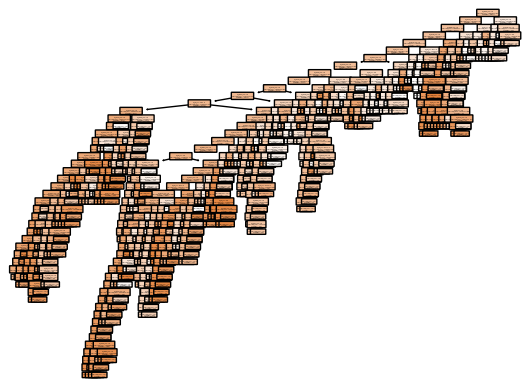

In [24]:
tree.plot_tree(model_dtr,filled=True, rounded=True)

# Regularization using Hyperparameter tuning

In [20]:
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 8, 12]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)





Best Hyperparameters: {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [23]:
# Evaluate the model on the test set
dtr_gcv=DecisionTreeRegressor(random_state=42,**grid_search.best_params_)
model_dtr=dtr_gcv.fit(X_train,y_train)

In [24]:
ypred_train=dtr_gcv.predict(X_train)
ypred_test=dtr_gcv.predict(X_test)

In [25]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 1400363.9895034693
Mean squared error for test data: 1399686.6302196528


In [26]:
# Example: Cross-validation with 5 folds
scores = cross_val_score(dtr_gcv, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated MSE: [ 9515777.03978463 12951244.86682166 11567435.09039036 11666715.79748654
 12182377.54642086]


In [27]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

9515777.03978463 12951244.866821663 11576710.06818081


In [28]:
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [15, 25,35],
    'min_samples_split': [3,5,7],
    'min_samples_leaf': [1,2,3]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [29]:
# Evaluate the model on the test set
dtr_gcv=DecisionTreeRegressor(random_state=42,**grid_search.best_params_)
model_dtr=dtr_gcv.fit(X_train,y_train)

In [30]:
ypred_train=dtr_gcv.predict(X_train)
ypred_test=dtr_gcv.predict(X_test)

In [31]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 170083.7819072488
Mean squared error for test data: 176404.0630097663


In [32]:
# Example: Cross-validation with 5 folds
scores = cross_val_score(dtr_gcv, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated MSE: [10645236.41834218 11451570.03223477 12422227.6194688  12943488.98785798
 12760127.98567791]


In [33]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10645236.41834218 12943488.98785798 12044530.20871633


In [34]:
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [25,35,45],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [0,1,2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 

Best Hyperparameters: {'max_depth': 45, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [35]:
# Evaluate the model on the test set
dtr_gcv=DecisionTreeRegressor(random_state=42,**grid_search.best_params_)
model_dtr=dtr_gcv.fit(X_train,y_train)

In [36]:
ypred_train=dtr_gcv.predict(X_train)
ypred_test=dtr_gcv.predict(X_test)

In [37]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 7961.35123001932
Mean squared error for test data: 9352.212985420627


In [38]:
# Example: Cross-validation with 5 folds
scores = cross_val_score(dtr_gcv, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated MSE: [10887694.85407392 11872594.00939929 12169680.26699647 12071853.13618375
 12815870.77540636]


In [39]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10887694.854073917 12815870.77540636 11963538.608411957


# Random Forest Regressor

In [25]:
rfr=RandomForestRegressor(random_state=42,n_jobs=-1)
model_rfr=rfr.fit(X_train,y_train)

In [26]:
ypred_train=model_rfr.predict(X_train)
ypred_test=model_rfr.predict(X_test)

In [27]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 46.99007211837455
Mean squared error for test data: 457.8991416860998


In [13]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 7616503.39362329 10927201.25538466 11377970.64529066]


In [14]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7616503.3936232915 11377970.645290663 9973891.764766203


# Regularization using Hyperparameter tuning

rfr=RandomForestRegressor(random_state=42,n_jobs=-1)

# Define the hyperparameter grid to search
param_grid = {"n_estimators":[50,100,150],
    'max_depth': [15,25,35],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2,8,12]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


In [42]:
sample_size = 14000
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [43]:
rfr=RandomForestRegressor(random_state=42,n_jobs=-1)

# Define the hyperparameter grid to search
param_grid = {'max_depth': [15,25,35], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [2,8,12] }

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train_sample, y_train_sample)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test set
rfr_gcv=RandomForestRegressor(random_state=42,**grid_search.best_params_,n_jobs=-1)
model_rfr=rfr.fit(X_train,y_train)

In [ ]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

In [ ]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(rfr_gcv, X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

In [ ]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

# Ada Boost regressor

In [30]:
abr=AdaBoostRegressor(random_state=42)
model_abr=abr.fit(X_train,y_train)

In [31]:
ypred_train=model_abr.predict(X_train)
ypred_test=model_abr.predict(X_test)

In [32]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 7951631.395104862
Mean squared error for test data: 8012604.357611647


In [15]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(AdaBoostRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8374221.6135997  10259185.40941612  8573794.19780924]


In [16]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8374221.613599701 10259185.409416124 9069067.073608354


In [33]:
abr_dt=AdaBoostRegressor(estimator=dtr,random_state=42)
model_abr_dt=abr_dt.fit(X_train,y_train)

In [34]:
ypred_train=model_abr_dt.predict(X_train)
ypred_test=model_abr_dt.predict(X_test)

In [35]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


# Gradient boost regressor

In [36]:
gbr=GradientBoostingRegressor(random_state=42)
model_gbr=gbr.fit(X_train,y_train)

In [37]:
ypred_train=model_gbr.predict(X_train)
ypred_test=model_gbr.predict(X_test)

In [38]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 4211905.574105535
Mean squared error for test data: 4204727.806755941


In [17]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(GradientBoostingRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [7857643.98427538 9397291.90648673 8970605.74120582]


In [18]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7857643.984275382 9397291.906486735 8741847.210655978


# XGBoost Regressor

In [39]:
xgbr=XGBRegressor(random_state=42)
model_xgbr=xgbr.fit(X_train,y_train)

In [40]:
ypred_train=model_xgbr.predict(X_train)
ypred_test=model_xgbr.predict(X_test)

In [41]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 56906.436232166445
Mean squared error for test data: 59186.6901545003


In [19]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(XGBRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8349878.56303237  9895317.89615928 13181019.38139675]


In [20]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8349878.563032366 13181019.381396752 10475405.280196132


# StackingRegressor

In [46]:
base_estimators=[
    ("XGBoostRegressor", XGBRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=DecisionTreeRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [43]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [44]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 577.9767314487633
Mean squared error for test data: 617.4717687795916


In [47]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(sr, X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [14616450.82199796 16523233.0130597  13759351.0581351 ]


In [48]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

13759351.058135098 16523233.013059702 14966344.964397589


In [45]:
base_estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=XGBRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [46]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [47]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 227.3716419613488
Mean squared error for test data: 224.4041816686861


In [49]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(StackingRegressor(estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
],final_estimator=XGBRegressor(random_state=42)), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [12623028.26556739 12672863.73993583 15099035.3688176 ]


In [50]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

12623028.265567392 15099035.3688176 13464975.791440273


# keeping 43 columns where names are removed

In [9]:
#Taking columns that are needed
df_new=df1[['recyclable_package', 'low_fat', 'department', 'family', 'promotion_name', 'media_type', 'sales_district', 'sales_region', 'store_type', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'state_province', 'country', 'marital_status', 'yearly_income', 'gender', 'education','member_card', 'occupation', 'houseowner','store_sales', 'store_cost', 'unit_sales', 'SRP', 'gross_weight', 'net_weight', 'units_per_case', 'cases_per_pallet', 'shelf_width', 'shelf_height', 'shelf_depth', 'cost', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'total_children', 'num_children_at_home', 'num_cars_owned', 'promotion_period']]

In [10]:
# Perform one-hot encoding using pd.get_dummies
df_new = pd.get_dummies(df_new)

In [11]:
#Setting target variable
X = df_new.drop(columns=['cost'])
y = df_new['cost']

In [12]:
#Splitting train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression

In [13]:
model_lr=sma.OLS(y_train,sma.add_constant(X_train)).fit()

In [14]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     190.1
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:50:08   Log-Likelihood:            -5.2166e+05
No. Observations:               56600   AIC:                         1.044e+06
Df Residuals:                   56454   BIC:                         1.045e+06
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1509.1133     21.645     69.722      0.000    1466.689    1551.537
recyclable_package                       -19.9184     20.948     -0.951      0.342     -60.978      21.141
low_fat                                  -17.7235     24.123     -0.735      0.463     -65.006      29.559
coffee_bar                               516.7422     28.745     17.977      0.000     460.401     573.083
video_store                             -297.3599     44.951     -6.615      0.000    -385.464    -209.256
salad_bar                               -726.4125     20.664    -35.153      0.000    -766.915    -685.910
prepared_food                            381.2032     29.342     12.992      0.000     323.692     438.714
florist                                  161.5809     31.310      5.161      0.000     100.212     222.950
store_sales                               -8.1708     16.210     -0.504      0.614     -39.943      23.602
store_cost                                 1.8076     23.583      0.077      0.939     -44.415      48.030
unit_sales                                 6.5093     30.863      0.211      0.833     -53.983      67.002
SRP                                       36.1355     42.206      0.856      0.392     -46.589     118.860
gross_weight                              13.2265     15.085      0.877      0.381     -16.341      42.794
net_weight                               -13.4718     14.893     -0.905      0.366     -42.663      15.719
units_per_case                             0.6181      1.011      0.611      0.541      -1.363       2.599
cases_per_pallet                          -3.2760      4.192     -0.782      0.434     -11.492       4.940
shelf_width                               -0.6424      1.804     -0.356      0.722      -4.178       2.893
shelf_height                              -2.0179      1.886     -1.070      0.285      -5.714       1.678
shelf_depth                               -2.5679      1.848     -1.390      0.165      -6.189       1.053
store_sqft                                 0.0941      0.085      1.113      0.266      -0.072       0.260
grocery_sqft                               0.0117      0.084      0.139      0.889      -0.153       0.176
frozen_sqft                             -447.8702     25.061    -17.871      0.000    -496.990    -398.751
meat_sqft                                671.6719     37.600     17.863      0.000     597.975     745.369
total_children                            -2.8035      7.985     -0.351      0.726     -18.455      12.848
num_children_at_home                     -10.7330     12.976     -0.827      0.408     -36.166      14.700
num_cars_owned                            62.9707     11.742      5.363      0.000     

In [15]:

significant_pvalues = model_lr.pvalues[model_lr.pvalues < 0.05]

# Print the significant p-values
if not significant_pvalues.empty:
    print("Significant p-values:")
    print(significant_pvalues)
else:
    print("No significant p-values.")

Significant p-values:
const                         0.000000e+00
coffee_bar                    4.721192e-72
video_store                   3.742758e-11
salad_bar                    8.317289e-268
prepared_food                 1.549911e-38
                                 ...      
occupation_Manual             1.548780e-24
occupation_Professional       1.214469e-08
occupation_Skilled Manual     2.320112e-37
houseowner_N                  0.000000e+00
houseowner_Y                  0.000000e+00
Length: 140, dtype: float64


In [16]:

significant_pvalues.index

Index(['const', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'frozen_sqft', 'meat_sqft', 'num_cars_owned',
       'promotion_period',
       ...
       'member_card_Golden', 'member_card_Normal', 'member_card_Silver',
       'occupation_Clerical', 'occupation_Management', 'occupation_Manual',
       'occupation_Professional', 'occupation_Skilled Manual', 'houseowner_N',
       'houseowner_Y'],
      dtype='object', length=140)

In [17]:
model_lr.params

const                        1509.113295
recyclable_package            -19.918387
low_fat                       -17.723533
coffee_bar                    516.742166
video_store                  -297.359863
                                ...     
occupation_Manual             370.519318
occupation_Professional       195.710594
occupation_Skilled Manual     451.168844
houseowner_N                  752.985791
houseowner_Y                  756.127505
Length: 190, dtype: float64

In [18]:
sig_pvalues_coef=model_lr.params[significant_pvalues.index]

In [21]:
sig_pvalues_coef.sort_values(ascending=False)

promotion_name_Dollar Days              3608.919651
promotion_name_Fantastic Discounts      3430.749331
promotion_name_Sale Winners             2953.588931
promotion_name_Sales Galore             2703.402361
promotion_name_Sales Days               2561.795881
                                           ...     
promotion_name_Money Savers            -2638.608832
promotion_name_Two for One             -2647.313366
promotion_name_Wallet Savers           -3059.995485
promotion_name_Price Slashers          -3609.219596
promotion_name_Cash Register Lottery   -4929.939096
Length: 140, dtype: float64

In [19]:
len(significant_pvalues)

140

In [21]:
ypred_train=model_lr.predict(sma.add_constant(X_train))
ypred_test=model_lr.predict(sma.add_constant(X_test))

In [22]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 5928549.452170067
Mean squared error for test data: 5950235.750755163


In [24]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [3.04817631e+22 1.16003552e+07 1.19383683e+07]


In [25]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

11600355.17784231 3.0481763072292487e+22 1.016058769076417e+22


# decision tree regressor
    

In [58]:
dtr=DecisionTreeRegressor(random_state=42)
model_dtr=dtr.fit(X_train,y_train)

In [59]:
ypred_train=model_dtr.predict(X_train)
ypred_test=model_dtr.predict(X_test)

In [60]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


In [26]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(DecisionTreeRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [12447447.54214722 11880591.26263569 13123992.69528898]


In [27]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

11880591.262635686 13123992.695288979 12484010.500023961


In [ ]:
dtr=DecisionTreeRegressor(random_state=42,max_depth=5)
model_dtr=dtr.fit(X_train,y_train)

In [ ]:
ypred_train=model_dtr.predict(X_train)
ypred_test=model_dtr.predict(X_test)

In [ ]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

# random forest regressor

In [61]:
rfr=RandomForestRegressor(random_state=42,n_jobs=-1)
model_rfr=rfr.fit(X_train,y_train)

In [62]:
ypred_train=model_rfr.predict(X_train)
ypred_test=model_rfr.predict(X_test)

In [63]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 13.289942097173135
Mean squared error for test data: 50.95223766518261


In [28]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 7596664.50781725 11053944.39623761 11470212.63632881]


In [29]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7596664.507817253 11470212.636328805 10040273.846794557


# Ada Boost regressor

In [64]:
abr=AdaBoostRegressor(random_state=42)
model_abr=abr.fit(X_train,y_train)

In [65]:
ypred_train=model_abr.predict(X_train)
ypred_test=model_abr.predict(X_test)

In [66]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 7951631.395104862
Mean squared error for test data: 8012604.357611647


In [30]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(AdaBoostRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8374419.42000229 10428486.43792067  8573794.19780924]


In [31]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8374419.420002285 10428486.437920665 9125566.685244061


In [67]:
abr_dt=AdaBoostRegressor(estimator=dtr,random_state=42)
model_abr_dt=abr_dt.fit(X_train,y_train)

In [68]:
ypred_train=model_abr_dt.predict(X_train)
ypred_test=model_abr_dt.predict(X_test)

In [69]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


# Gradient boost regressor

In [70]:
gbr=GradientBoostingRegressor(random_state=42)
model_gbr=gbr.fit(X_train,y_train)

In [71]:
ypred_train=model_gbr.predict(X_train)
ypred_test=model_gbr.predict(X_test)

In [72]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 4215436.551087363
Mean squared error for test data: 4211254.272407531


In [32]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(GradientBoostingRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [7792139.55852345 9172316.19423001 9181159.38550859]


In [33]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7792139.558523453 9181159.38550859 8715205.046087349


# XGBoost Regressor

In [73]:
xgbr=XGBRegressor(random_state=42)
model_xgbr=xgbr.fit(X_train,y_train)

In [74]:
ypred_train=model_xgbr.predict(X_train)
ypred_test=model_xgbr.predict(X_test)

In [75]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 42784.28821444776
Mean squared error for test data: 44259.765610680224


In [34]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(XGBRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 7557473.98672908  9874231.92974965 13141868.98116452]


In [35]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7557473.98672908 13141868.981164517 10191191.63254775


# StackingRegressor

In [76]:
base_estimators=[
    ("XGBoostRegressor", XGBRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=DecisionTreeRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [77]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [78]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 71.753074204947
Mean squared error for test data: 119.69549855133913


In [55]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(StackingRegressor(estimators=[
    ("XGBoostRegressor", XGBRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
],final_estimator=DecisionTreeRegressor(random_state=42)), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [16201619.31822422 11700787.23138569 17295045.63329517]


In [56]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

11700787.231385686 17295045.63329517 15065817.394301692


In [79]:
base_estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=XGBRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [80]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [81]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 229.0183163233233
Mean squared error for test data: 224.93418490700515


In [57]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(StackingRegressor(estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
],final_estimator=XGBRegressor(random_state=42)), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [12437281.86174738 10847350.74061426 10938249.92808925]


In [58]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10847350.740614261 12437281.861747377 11407627.510150297


In [ ]:
df1.columns

In [ ]:
li=['store_sales', 'store_cost', 'unit_sales','brand_name', 'product_name','SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'cases_per_pallet', 'shelf_width', 'shelf_height', 'shelf_depth',
       'subcategory', 'category', 'department', 'family','promotion_name', 'media_type', 'cost','sales_city',
       'sales_state_province', 'sales_district', 'sales_region',
       'sales_country','store_type', 'store_name','store_city', 'store_state','store_country', 'store_manager','store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist','city',
       'state_province','country','marital_status', 'yearly_income',
       'gender', 'total_children', 'num_children_at_home', 'education','member_card', 'occupation', 'houseowner',
       'num_cars_owned','promotion_period']

In [ ]:
len(li)

In [1]:
'recyclable_package', 'low_fat', 'department', 'family', 'promotion_name', 'media_type', 'sales_district',
'sales_region', 'store_type', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'state_province',
'country', 'marital_status', 'yearly_income', 'gender', 'education','member_card', 'occupation', 'houseowner','store_sales',
'store_cost', 'unit_sales', 'SRP', 'gross_weight', 'net_weight', 'units_per_case', 'cases_per_pallet', 'shelf_width',
'shelf_height', 'shelf_depth', 'cost', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'total_children',
'num_children_at_home', 'num_cars_owned', 'promotion_period']]

NameError: name 'df1' is not defined

In [8]:
df1

,product_id,time_id,customer_id,promotion_id,store_id,store_sales,store_cost,unit_sales,product_class_id,brand_name,...,houseowner,num_cars_owned,fullname,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,promotion_period
0,451,677,7366,207,3,7.12,2.2784,4,55,Red Wing,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
1,1293,677,7366,207,3,5.76,1.7856,4,14,Booker,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
2,738,677,7366,207,3,5.55,2.0535,3,39,Consolidated,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
3,1426,677,8947,207,3,7.48,2.2440,2,61,Hermanos,...,Y,2,Robert Bell,11/7/1997,Friday,1997,11,7,34279,4
4,338,677,8947,207,3,2.28,1.0488,4,58,Better,...,Y,2,Robert Bell,11/7/1997,Friday,1997,11,7,34279,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70746,1140,1055,5980,1577,20,7.68,3.5328,3,99,Tri-State,...,Y,3,Cheryl Barta,11/20/1998,Friday,1998,11,20,34657,3
70747,185,1055,5980,1577,20,2.85,0.8835,5,61,High Top,...,Y,3,Cheryl Barta,11/20/1998,Friday,1998,11,20,34657,3
70748,1397,1055,3657,1577,20,4.29,1.4586,3,18,Sunset,...,Y,2,Nicola Anglin,11/20/1998,Friday,1998,11,20,34657,3
70749,488,1055,3657,1577,20,5.18,2.0720,2,61,Tell Tale,...,Y,2,Nicola Anglin,11/20/1998,Friday,1998,11,20,34657,3
